# **Milestone 1: Data Preparation & Initial Analysis (Weeks 1-2)**

● Tasks:

○ Download the Global Weather Repository dataset from Kaggle.

○ Set up project environment.

○ Inspect dataset structure, data types, and key variables.

○ Identify missing values, anomalies, and data coverage.

○ Handle missing or inconsistent entries.

○ Convert units and normalize values.

○ Aggregate or filter data (e.g., daily to monthly averages).


● Evaluation:

○ Deliverable: Cleaned and preprocessed dataset, along with a summary
document outlining data schema, key variables, and data quality issues.

○ Success Criteria: Dataset is successfully downloaded, cleaned, and
transformed into a usable format, ready for analysis.

# 1. Import Libraries

In [30]:
# 1. Import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 2. Load the Dataset

In [31]:
df = pd.read_csv("weather_filled.csv", low_memory=False)

### 3. **Explore dataset using .head(), .info(), .shape, .describe()**

In [32]:
print("Shape:", df.shape)

Shape: (135023, 41)


In [33]:
df.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1693301400,2023-08-29 14:00,28.8,83.8,Sunny,...,7.9,11.1,1,1,05:24 AM,06:24 PM,05:39 PM,02:48 AM,Waxing Gibbous,93
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1693301400,2023-08-29 11:30,27.0,80.6,Partly cloudy,...,28.2,29.6,2,3,06:04 AM,07:19 PM,06:50 PM,03:25 AM,Waxing Gibbous,93
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1693301400,2023-08-29 10:30,28.0,82.4,Partly cloudy,...,6.4,7.9,1,1,06:16 AM,07:21 PM,06:46 PM,03:50 AM,Waxing Gibbous,93
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1693301400,2023-08-29 11:30,10.2,50.4,Sunny,...,0.5,0.8,1,1,07:16 AM,08:34 PM,08:08 PM,04:38 AM,Waxing Gibbous,93
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1693301400,2023-08-29 10:30,25.0,77.0,Partly cloudy,...,139.6,203.3,4,10,06:11 AM,06:06 PM,04:43 PM,04:41 AM,Waxing Gibbous,93


In [34]:
df.columns

Index(['country', 'location_name', 'latitude', 'longitude', 'timezone',
       'last_updated_epoch', 'last_updated', 'temperature_celsius',
       'temperature_fahrenheit', 'condition_text', 'wind_mph', 'wind_kph',
       'wind_degree', 'wind_direction', 'pressure_mb', 'pressure_in',
       'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius',
       'feels_like_fahrenheit', 'visibility_km', 'visibility_miles',
       'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide',
       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
       'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
       'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'sunrise',
       'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination'],
      dtype='object')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135023 entries, 0 to 135022
Data columns (total 41 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   country                       135023 non-null  object 
 1   location_name                 135023 non-null  object 
 2   latitude                      135023 non-null  float64
 3   longitude                     135023 non-null  float64
 4   timezone                      135023 non-null  object 
 5   last_updated_epoch            135023 non-null  int64  
 6   last_updated                  135023 non-null  object 
 7   temperature_celsius           135023 non-null  float64
 8   temperature_fahrenheit        135023 non-null  float64
 9   condition_text                135023 non-null  object 
 10  wind_mph                      135023 non-null  float64
 11  wind_kph                      135023 non-null  float64
 12  wind_degree                   135023 non-nul

In [36]:
df.describe()

,latitude,longitude,last_updated_epoch,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,pressure_mb,pressure_in,...,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination
count,135023.000000,135023.000000,1.350230e+05,135023.000000,135023.000000,135023.000000,135023.000000,135023.000000,135023.000000,135023.000000,...,135023.000000,135023.000000,135023.000000,135023.000000,135023.000000,135023.000000,135023.000000,135023.000000,135023.000000,135023.000000
mean,19.185123,22.024850,1.725922e+09,21.692591,71.047825,8.048004,12.955092,168.484606,1013.884871,29.939367,...,19.140627,535.456868,57.441335,15.244491,10.324009,25.816433,51.378030,1.712168,2.662109,50.597120
std,24.482024,65.785243,1.868481e+07,9.679223,17.422647,7.252932,11.671252,103.995914,10.457361,0.308726,...,14.031703,1054.786243,34.011629,26.363121,36.634134,49.275046,149.683607,1.011875,2.609537,35.012461
min,-41.300000,-175.200000,1.693301e+09,-41.900000,-43.400000,2.200000,3.600000,1.000000,947.000000,27.960000,...,0.000000,-9999.000000,0.000000,0.000000,-9999.000000,0.168000,-1848.150000,1.000000,1.000000,0.000000
25%,3.750000,-6.836100,1.708708e+09,16.100000,61.000000,3.800000,6.100000,80.000000,1010.000000,29.830000,...,10.800000,236.800000,35.000000,1.200000,0.700000,5.100000,8.146500,1.000000,1.000000,16.000000
50%,17.250000,23.316700,1.727085e+09,24.200000,75.500000,6.900000,11.200000,160.000000,1013.000000,29.920000,...,16.600000,314.500000,55.800000,4.600000,2.220000,12.950000,19.500000,1.000000,2.000000,51.000000
75%,40.400000,50.580000,1.742032e+09,28.200000,82.700000,11.000000,17.600000,255.000000,1018.000000,30.060000,...,25.500000,487.300000,76.000000,16.835000,8.000000,28.305000,44.770000,2.000000,3.000000,85.000000
max,64.150000,179.220000,1.756973e+09,49.200000,120.600000,1841.200000,2963.200000,360.000000,3006.000000,88.770000,...,2970.400000,41870.102000,555.000000,575.800000,557.000000,1614.100000,6037.290000,6.000000,10.000000,100.000000


## 4. Missing values & duplicates


In [37]:
df.isnull().sum()

,0
country,0
location_name,0
latitude,0
longitude,0
timezone,0
last_updated_epoch,0
last_updated,0
temperature_celsius,0
temperature_fahrenheit,0
condition_text,0


In [38]:
# Or, to see missing values as percentages
(df.isnull().sum() / len(df)) * 100

,0
country,0.0
location_name,0.0
latitude,0.0
longitude,0.0
timezone,0.0
last_updated_epoch,0.0
last_updated,0.0
temperature_celsius,0.0
temperature_fahrenheit,0.0
condition_text,0.0


In [39]:
# Count total duplicate rows
df.duplicated().sum()

# Display the duplicate rows (optional)
df[df.duplicated()]


,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination


## 5. Understand data types and key variables

In [40]:
# Show data types of all columns
df.dtypes

,0
country,object
location_name,object
latitude,float64
longitude,float64
timezone,object
last_updated_epoch,int64
last_updated,object
temperature_celsius,float64
temperature_fahrenheit,float64
condition_text,object


## 6. Convert data types (e.g., date → datetime)

In [41]:
# Correct date format conversion
df['last_updated'] = pd.to_datetime(df['last_updated'], format="%Y-%m-%d %H:%M", errors='coerce')

# Confirm the result
df['last_updated'].dtypes, df['last_updated'].head()


(dtype('<M8[ns]'),
 0   2023-08-29 14:00:00
 1   2023-08-29 11:30:00
 2   2023-08-29 10:30:00
 3   2023-08-29 11:30:00
 4   2023-08-29 10:30:00
 Name: last_updated, dtype: datetime64[ns])

## 7. Filter Noisy data

In [42]:
# Example checks for unrealistic weather values
df[(df['temperature_celsius'] < -80) | (df['temperature_celsius'] > 60)]
df[(df['humidity'] < 0) | (df['humidity'] > 100)]
df[(df['wind_kph'] < 0)]


,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination


In [43]:
# Remove unrealistic temperature, humidity, and wind speed values
df = df[
    (df['temperature_celsius'].between(-80, 60)) &
    (df['humidity'].between(0, 100)) &
    (df['wind_kph'] >= 0)
]


In [44]:
# Drop rows where any key variable is missing
df = df.dropna(subset=['temperature_celsius', 'humidity', 'wind_kph'])


In [45]:
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135023 entries, 0 to 135022
Data columns (total 41 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   country                       135023 non-null  object        
 1   location_name                 135023 non-null  object        
 2   latitude                      135023 non-null  float64       
 3   longitude                     135023 non-null  float64       
 4   timezone                      135023 non-null  object        
 5   last_updated_epoch            135023 non-null  int64         
 6   last_updated                  135023 non-null  datetime64[ns]
 7   temperature_celsius           135023 non-null  float64       
 8   temperature_fahrenheit        135023 non-null  float64       
 9   condition_text                135023 non-null  object        
 10  wind_mph                      135023 non-null  float64       
 11  wind_kph     

## 8. Comparison Graphs for better understanding of dataset

In [46]:
# For cleaner style
sns.set(style="whitegrid", palette="pastel")

/tmp/ipython-input-577307753.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='temperature_celsius', y='humidity', ci=None)


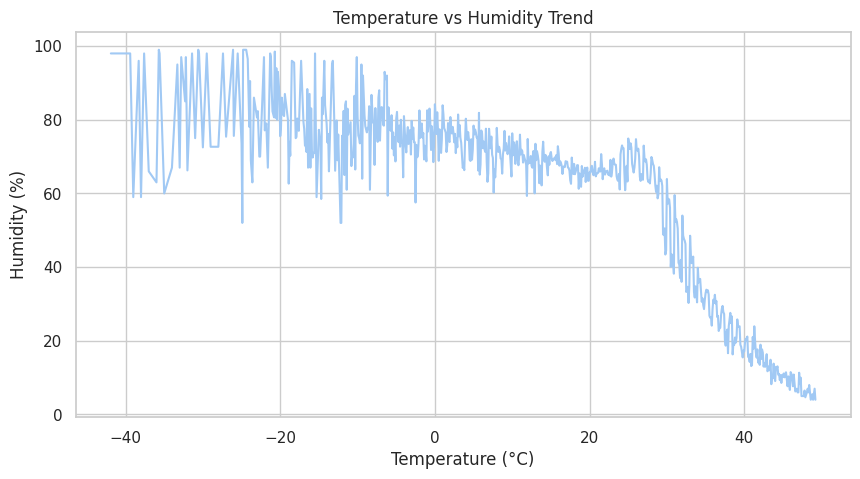

In [47]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='temperature_celsius', y='humidity', ci=None)
plt.title("Temperature vs Humidity Trend")
plt.xlabel("Temperature (°C)")
plt.ylabel("Humidity (%)")
plt.show()

#Shows how humidity changes with temperature — inverse relationship often appears.


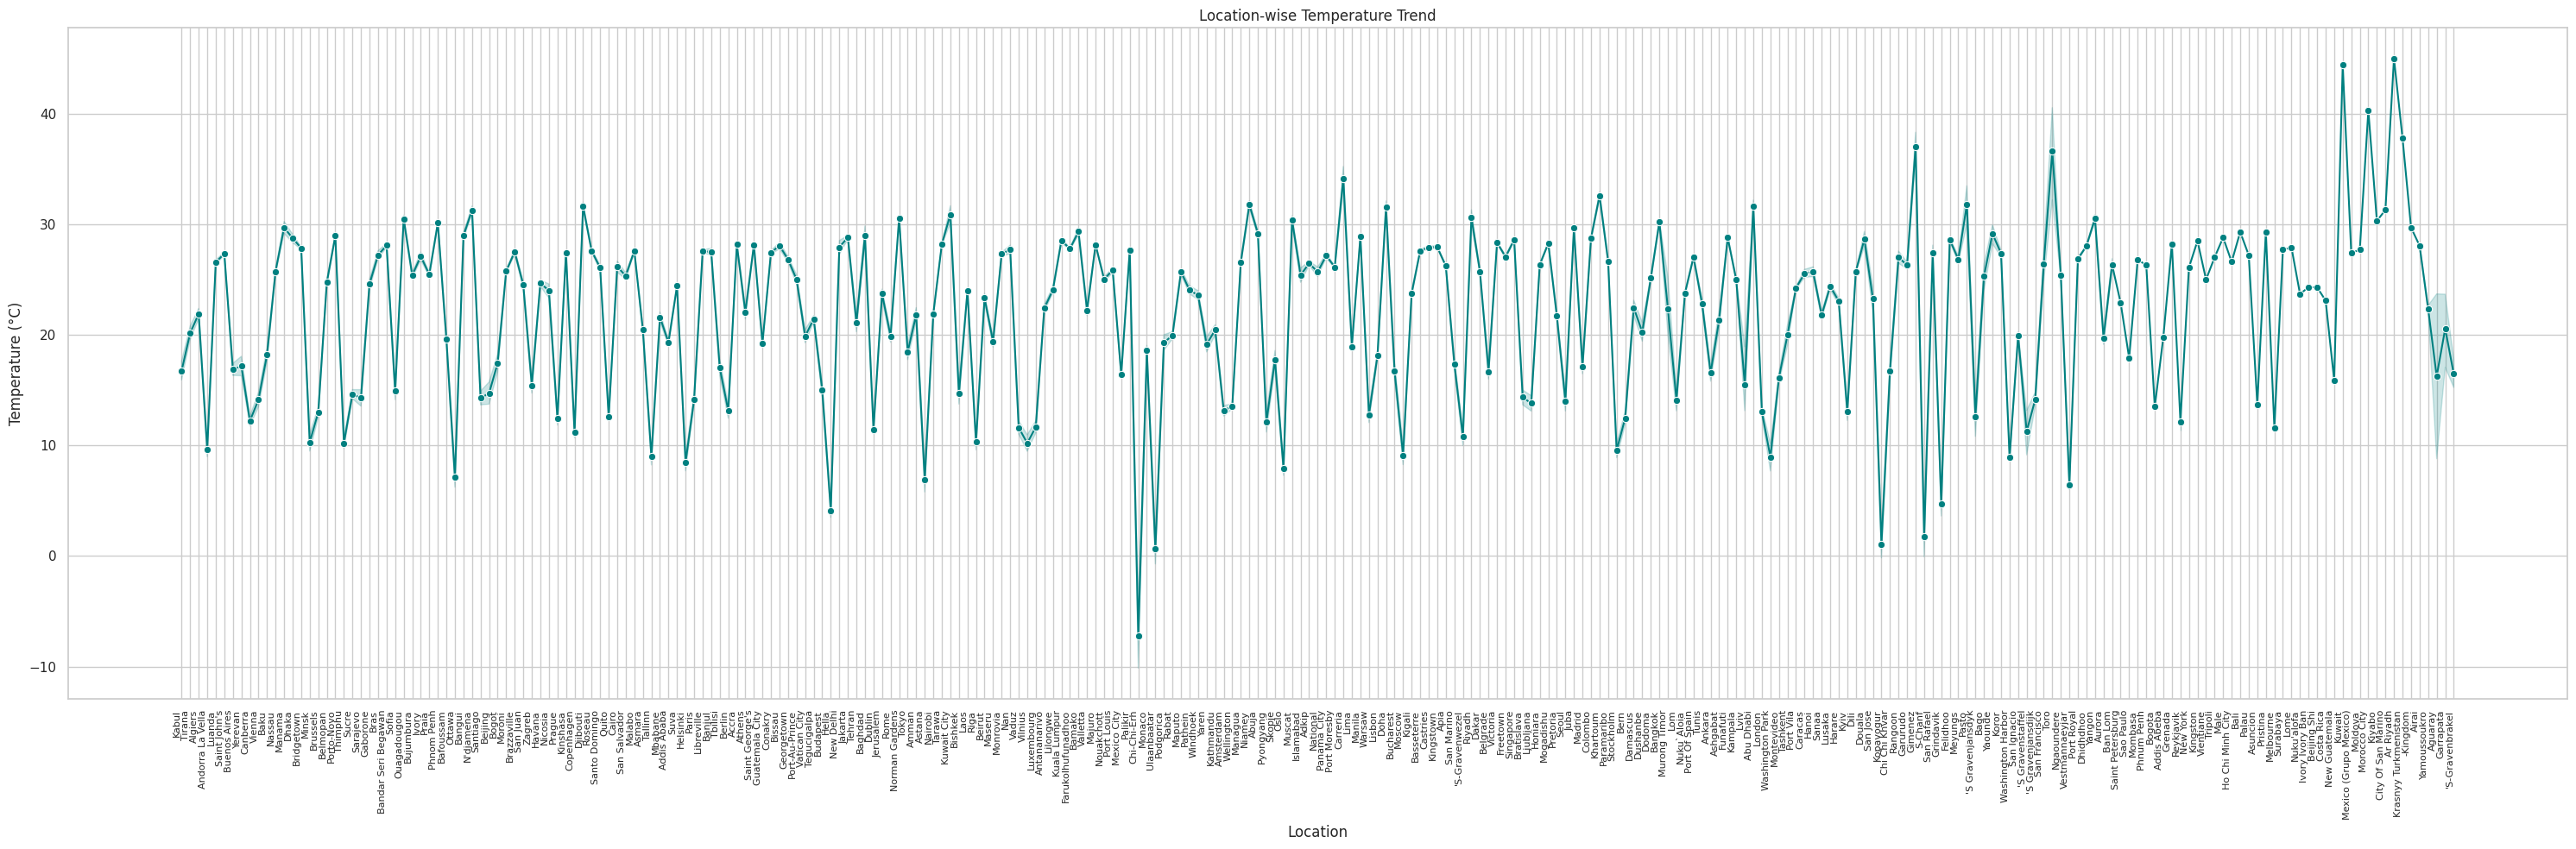

In [48]:
plt.figure(figsize=(30,10))
sns.lineplot(data=df, x='location_name', y='temperature_celsius', marker='o', color='teal')
plt.title("Location-wise Temperature Trend")
plt.xlabel("Location")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=90, ha='right', fontsize='8')
plt.tight_layout()
plt.show()


#Each box shows how temperature varies across cities or locations.

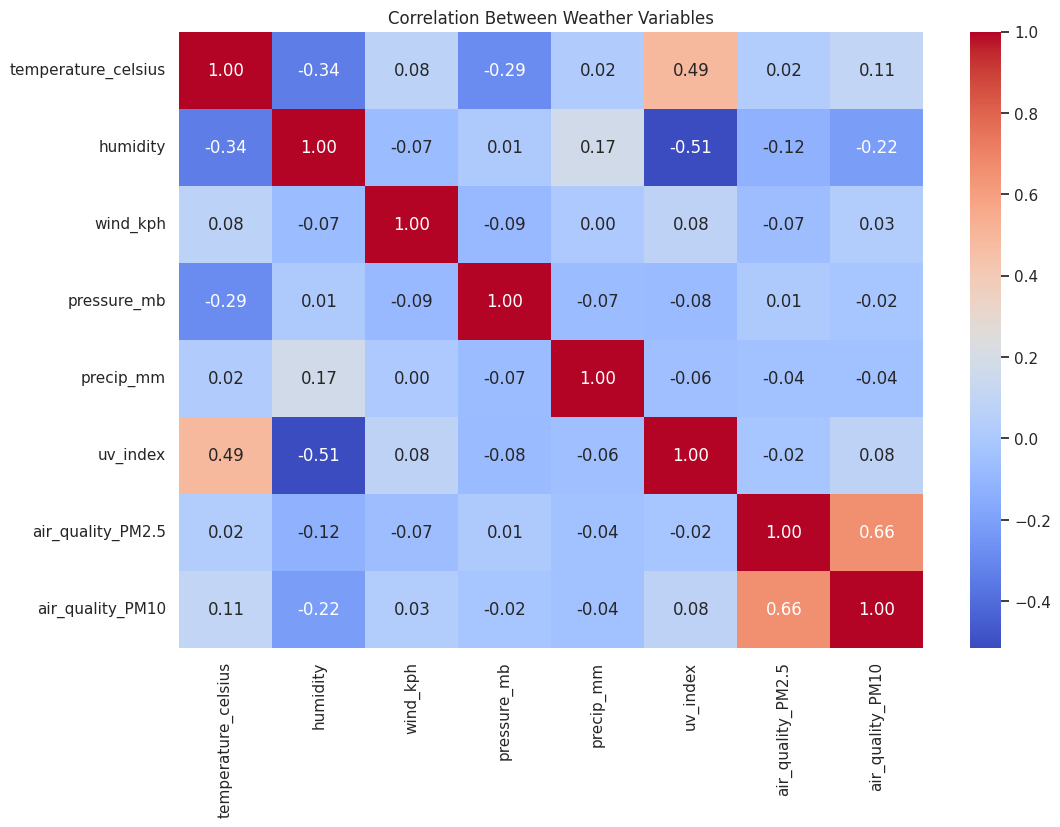

In [49]:
plt.figure(figsize=(12,8))
sns.heatmap(df[['temperature_celsius','humidity','wind_kph','pressure_mb',
                'precip_mm','uv_index','air_quality_PM2.5','air_quality_PM10']].corr(),
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Weather Variables")
plt.show()

#Quickly identifies which variables move together or inversely.


## 9. Detect and remove Outliers

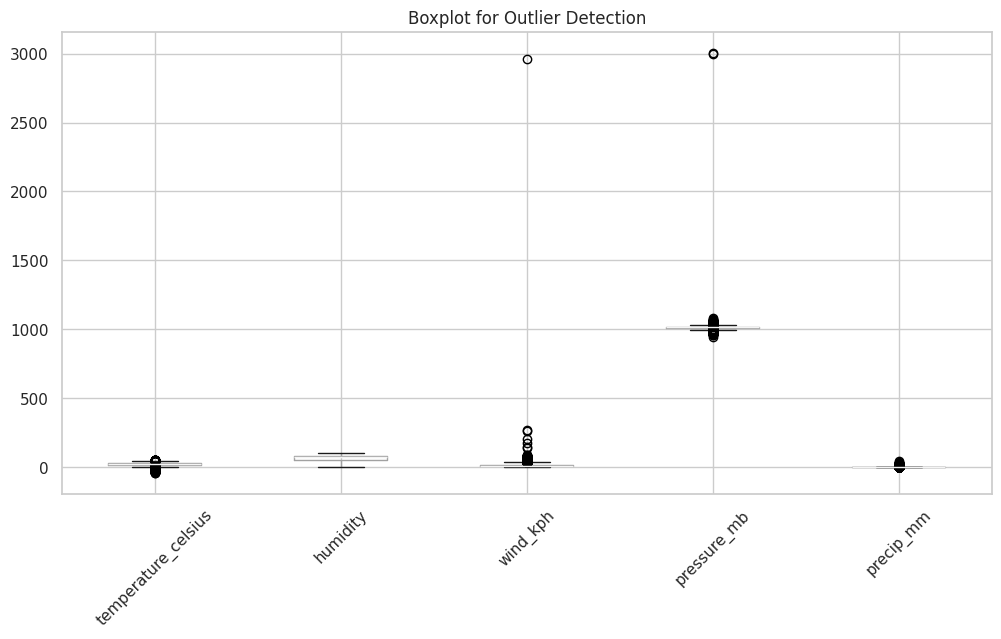

In [50]:
numeric_cols = ['temperature_celsius', 'humidity', 'wind_kph', 'pressure_mb', 'precip_mm']

# Plot boxplots for each numeric column
plt.figure(figsize=(12, 6))
df[numeric_cols].boxplot()
plt.title("Boxplot for Outlier Detection")
plt.xticks(rotation=45)
plt.show()


In [51]:
# Function to remove outliers using IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

# Apply on key numeric columns
for col in numeric_cols:
    df = remove_outliers_iqr(df, col)

print("✅ Outliers removed successfully!")


✅ Outliers removed successfully!


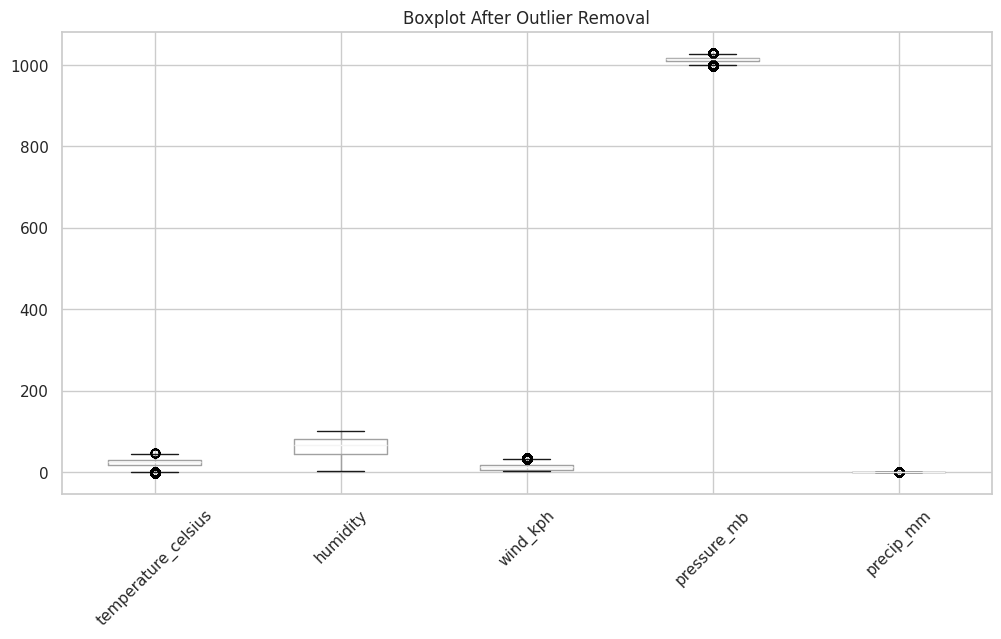

In [52]:
plt.figure(figsize=(12, 6))
df[numeric_cols].boxplot()
plt.title("Boxplot After Outlier Removal")
plt.xticks(rotation=45)
plt.show()


In [53]:
num_cols = ['temperature_celsius', 'humidity', 'wind_kph', 'pressure_mb', 'precip_mm']

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

print("✅ Outliers removed successfully! Final shape:", df.shape)


✅ Outliers removed successfully! Final shape: (81554, 41)


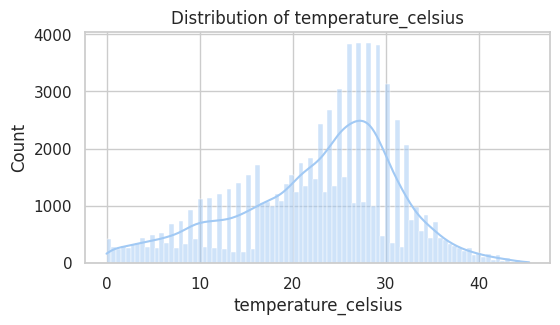

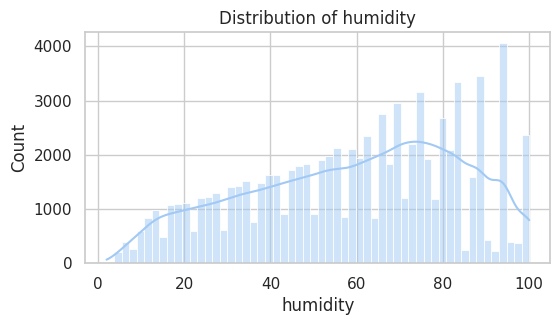

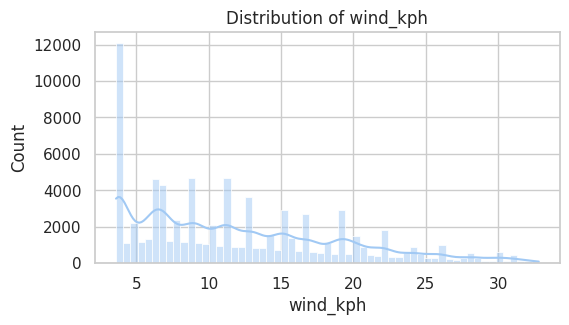

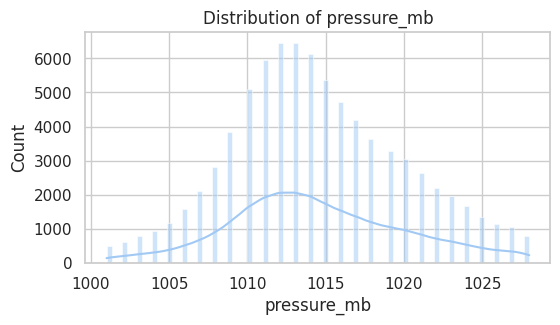

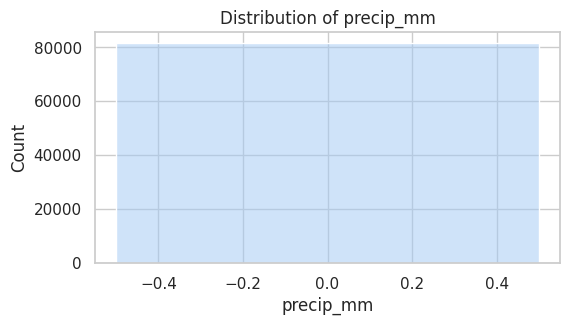

In [54]:
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


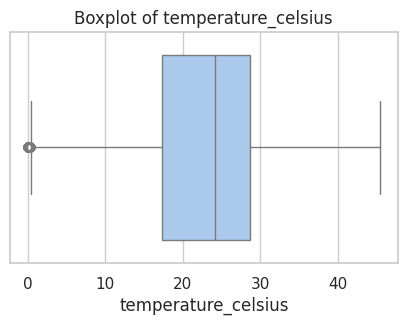

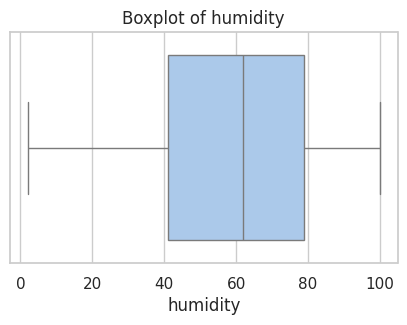

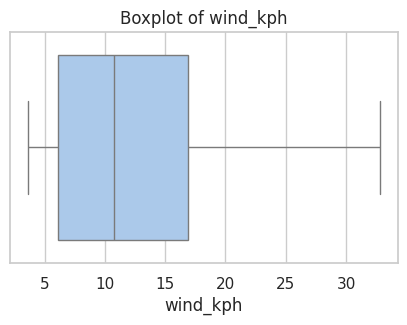

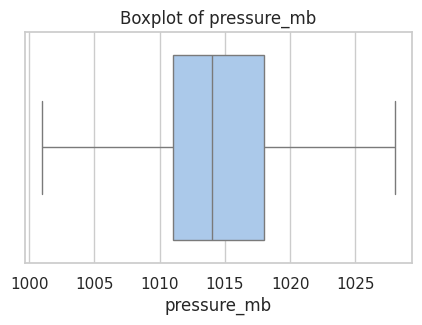

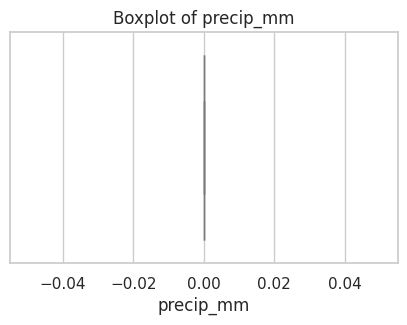

In [55]:
for col in num_cols:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


In [56]:
df['temperature_celsius'].describe()


,temperature_celsius
count,81554.000000
mean,22.700960
std,8.567993
min,0.000000
25%,17.300000
50%,24.200000
75%,28.600000
max,45.400000


In [58]:
df.to_csv("cleaned_dataset.csv", index=False)

from google.colab import files
files.download("cleaned_dataset.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>